# Capítulo 15: Usando a RDKit para manipular dados químicos

Livro: Aprendendo Química com Python, Rodrigo Q. de Albuquerque & Gerd B. da Rocha, 2021, Amazon Book.

E-Mail: learn.chem.python@gmail.com

## Versão do Python usada

In [2]:
import sys
print(sys.version)

3.7.10 | packaged by conda-forge | (default, Feb 19 2021, 16:07:37) 
[GCC 9.3.0]


## Desenhando estruturas 2D e 3D de moléculas

In [3]:
# Importando os módulos da RDKit
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

In [4]:
# Colocar False se você quiser PNGs ao invés de SVGs
IPythonConsole.ipython_useSVG=False  

In [5]:
from rdkit import rdBase

In [6]:
# Para imprimir a versão da RDKit usada
print(rdBase.rdkitVersion)  
print(rdBase.boostVersion)

2021.03.1
1_74


### Caixa de sessão interativa 49: Primeiros passos com a RDKit

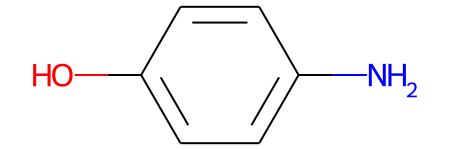

In [8]:
# Estrutura de linhas a partir do código SMILES
m_01 = Chem.MolFromSmiles('Nc1ccc(O)cc1') 
m_01

In [10]:
%%file mol.mol

 4-aminofenol

 15 15  0  0  0  0  0  0  0  0999 V2000
    0.9541   -0.0446    0.2330 N   0  0  0  0  0  0  0  0  0  0  0  0
    2.3249   -0.0296   -0.0528 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0240    1.1810   -0.0845 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4113    1.2033   -0.2572 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.1051    0.0025   -0.3530 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4560   -0.0264   -0.5310 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.4371   -1.2102   -0.2527 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0508   -1.2239   -0.0805 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4652    0.7898   -0.0760 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.4875   -0.8938   -0.0700 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.4900    2.1217    0.0229 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.9254    2.1573   -0.2987 H   0  0  0  0  0  0  0  0  0  0  0  0
    6.7748    0.8862   -0.6199 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.9918   -2.1431   -0.2963 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.5427   -2.1778    0.0275 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0  0  0  0
  1  9  1  0  0  0  0
  1 10  1  0  0  0  0
  2  3  2  0  0  0  0
  2  8  1  0  0  0  0
  3  4  1  0  0  0  0
  3 11  1  0  0  0  0
  4  5  2  0  0  0  0
  4 12  1  0  0  0  0
  5  6  1  0  0  0  0
  5  7  1  0  0  0  0
  6 13  1  0  0  0  0
  7  8  2  0  0  0  0
  7 14  1  0  0  0  0
  8 15  1  0  0  0  0
M  END

Writing mol.mol


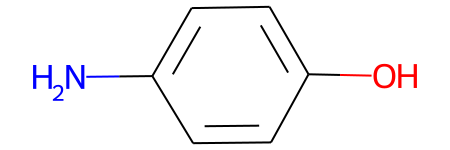

In [11]:
# Estrutura de linhas a partir de arquivo ".mol "
m_02 = Chem.MolFromMolFile('mol.mol')
m_02

In [12]:
# Contando o número de átomos do objeto "m_01"
print(f'O número de átomos da molécula 4-aminofenol é {m_01.GetNumAtoms()}') 

O número de átomos da molécula 4-aminofenol é 8


In [13]:
# Adicionando hidrogênios à molécula m_01 e contando os átomos
m_01_H = Chem.AddHs(m_01)
print(f'O número de átomos do 4-aminofenol com hidrogênios é {m_01_H.GetNumAtoms()}')

O número de átomos do 4-aminofenol com hidrogênios é 15


In [14]:
# Para imprimir as ligações químicas entre os átomos 
for bond in m_01.GetBonds():
    print(bond.GetBondType())

SINGLE
AROMATIC
AROMATIC
AROMATIC
SINGLE
AROMATIC
AROMATIC
AROMATIC


In [15]:
# Para obter as hibridizações de todos os átomos 
for x in m_01.GetAtoms():
    print(f'O tipo de hibridização do átomo {x.GetIdx()} é {x.GetHybridization()}')

O tipo de hibridização do átomo 0 é SP2
O tipo de hibridização do átomo 1 é SP2
O tipo de hibridização do átomo 2 é SP2
O tipo de hibridização do átomo 3 é SP2
O tipo de hibridização do átomo 4 é SP2
O tipo de hibridização do átomo 5 é SP2
O tipo de hibridização do átomo 6 é SP2
O tipo de hibridização do átomo 7 é SP2


### Caixa de sessão interativa 50: Avançando com a RDKit

In [26]:
# Detalhes sobre a estrutura molecular no objeto m_01
print(f'O átomo na posição 1 é o {m_01.GetAtomWithIdx(1).GetSymbol()}')

O átomo na posição 1 é o C


In [17]:
print(f'A valência do átomo 1 é {m_01.GetAtomWithIdx(1).GetExplicitValence()}')

A valência do átomo 1 é 4


In [18]:
print(f'A ligação entre os átomos 0 e 1 é {m_01.GetBondBetweenAtoms(0,1).GetBondType()}')

A ligação entre os átomos 0 e 1 é SINGLE


In [19]:
# Gerando o código SMILES a partir de um arquivo "mol" lido para o objeto m_02
m_02_smi = Chem.MolToSmiles(m_02,isomericSmiles=False) 
m_02_smi

'Nc1ccc(O)cc1'

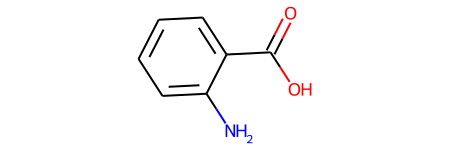

In [21]:
# Imprimindo o arquivo de coordenadas no formato ".mol" gerado a partir do código SMILES
# A molécula é o ácido orto-aminobenzóico
m_03 = Chem.MolFromSmiles('Nc1ccccc1C(=O)O')
m_03

Ácido o-aminobenzóico
     RDKit          2D

 10 10  0  0  0  0  0  0  0  0999 V2000
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    3.8971    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  2  0
  3  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  8 10  1  0
  7  2  1  0
M  END



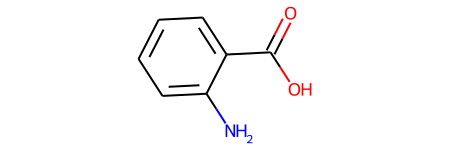

In [22]:
# Inserir o nome da molécula no arquivo ".mol"
m_03.SetProp("_Name","Ácido o-aminobenzóico") 
print(Chem.MolToMolBlock(m_03))
m_03

### Caixa de sessão interativa 51: Otimização de geometria e análise conformacional

In [27]:
# Carregando o módulo AllChem do RDKit
from rdkit.Chem import AllChem

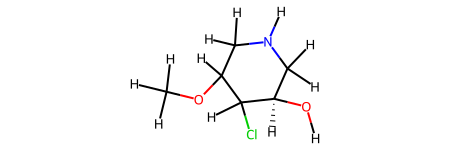

In [34]:
trp = Chem.MolFromSmiles('COC1CNC[C@@H](O)C1Cl')
trp_H = Chem.AddHs(trp)
trp_H

In [35]:
# Gera coordenadas iniciais para o objeto "trp_H"
status = AllChem.EmbedMolecule(trp_H)

In [36]:
# Otimiza a geometria com o campo de força MMFF94
status = AllChem.MMFFOptimizeMolecule(trp_H)

In [37]:
# Busca conformacional 
conf = AllChem.EmbedMultipleConfs(trp_H, numConfs=10, pruneRmsThresh=1)
len(conf) # Imprime o número de confórmeros encontrados

1

In [38]:
# Otimiza as geometrias dos confórmeros encontrados
for icf in conf:
    AllChem.MMFFOptimizeMolecule(trp_H, confId=icf)

In [39]:
# Imprime as energias de cada confórmero encontrado
for icf in conf:
    trp_H_prop = AllChem.MMFFGetMoleculeForceField(trp_H, AllChem.MMFFGetMoleculeProperties(trp_H), confId=icf)
    print('A energia do confórmero %i é igual a %.2f kcal/mol' % (icf, trp_H_prop.CalcEnergy()))

A energia do confórmero 0 é igual a 70.62 kcal/mol


## Usando a RDKit e Mordred para calcular descritores moleculares

In [42]:
# Códigos SMILES de 30 solventes orgânicos
solventes = ['c1ccccc1', 'CO', 'CCO', 'Cc1ccccc1', 'Cc1ccc(C)cc1', 'Cc1cccc(C)c1', 'Cc1ccccc1C', 
             'C1CCCCC1', 'CCCCCCCCO', 'CCCCC', 'CCCCCC', 'CCCCCCC', 'CC=O', 'CCOC(C)=O', 'CC(=O)C', 
             'CC#N', 'O=C(O)C', 'O=CO', 'CC(C)O', 'CCCCO', 'C(Cl)(Cl)Cl', 'O=CN(C)C', 'CS(C)=O', 
             'CCOCC', 'CCC(=O)C', 'C1=NC=CC=C1', 'C(Cl)(Cl)(Cl)Cl', 'C1CCCO1', 'CCN(CC)CC', 'CCOCCO']

### Caixa de sessão interativa 52: Nomeando estruturas com a biblioteca PubChemPy

In [43]:
# Converta de SMILES para objeto da RDKit
size_solv = len(solventes) # Tamanho da lista 
solv_smi = size_solv*['']  # Gera uma lista vazia
for ms in range(size_solv): 
    solv_smi[ms] = Chem.MolFromSmiles(solventes[ms]) 

In [44]:
import pubchempy
names_smi = size_solv*['']
for i in range(size_solv):
    smi = solventes[i]
    c = pubchempy.get_compounds(smi, namespace='smiles')
    match = c[0]
    names_smi[i] = match.iupac_name

In [45]:
print(names_smi)

['benzene', 'methanol', 'ethanol', 'toluene', '1,4-xylene', '1,3-xylene', '1,2-xylene', 'cyclohexane', 'octan-1-ol', 'pentane', 'hexane', 'heptane', 'acetaldehyde', 'ethyl acetate', 'propan-2-one', 'acetonitrile', 'acetic acid', 'formic acid', 'propan-2-ol', 'butan-1-ol', 'chloroform', 'N,N-dimethylformamide', 'methylsulfinylmethane', 'ethoxyethane', 'butan-2-one', 'pyridine', 'tetrachloromethane', 'oxolane', 'N,N-diethylethanamine', '2-ethoxyethanol']


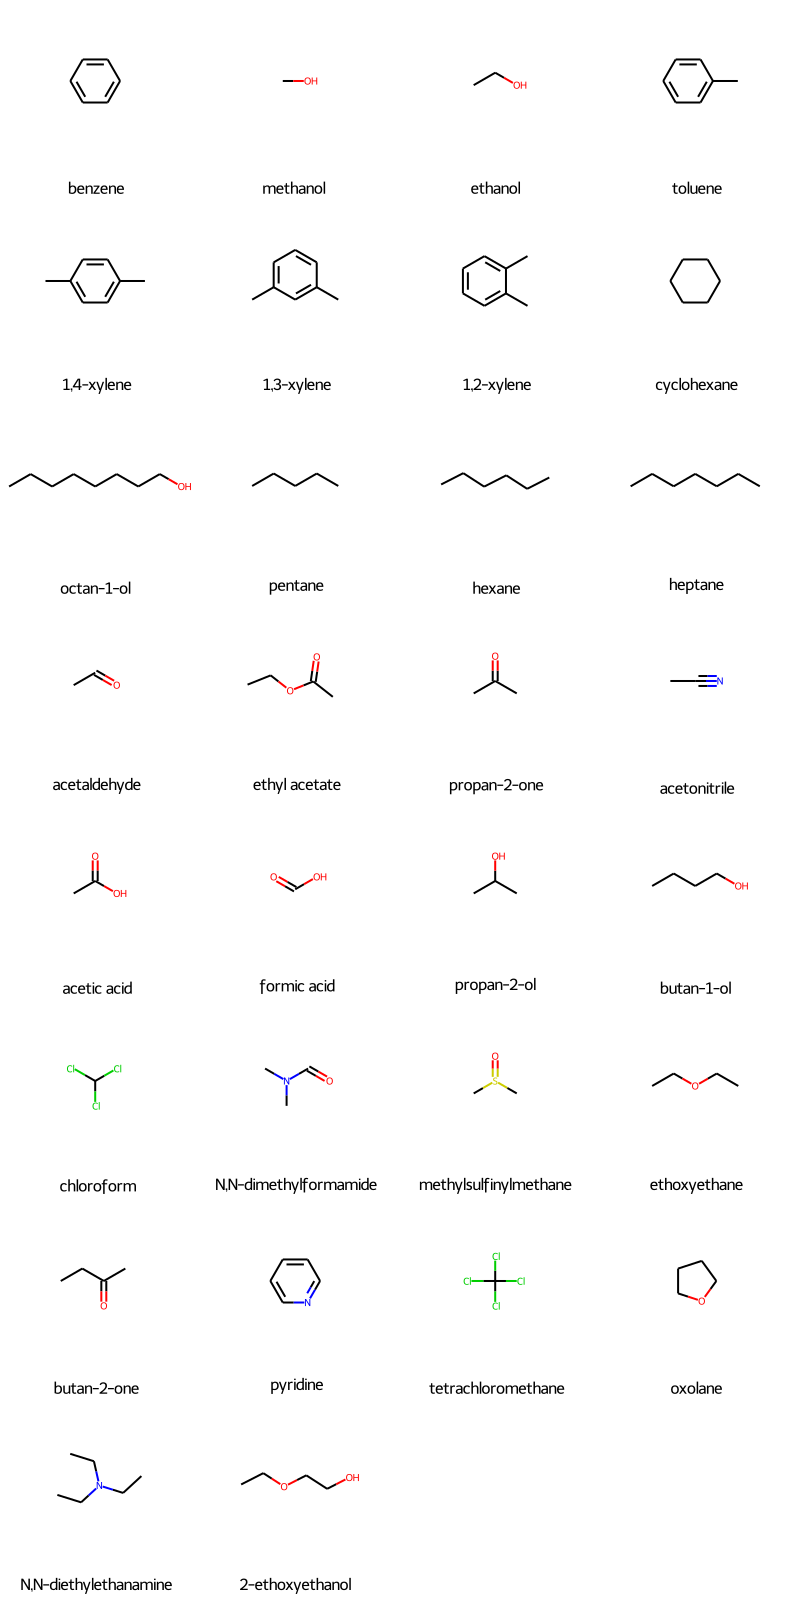

In [46]:
# Visualize as estruturas e seus nomes IUPAC em uma grade
img = Draw.MolsToGridImage(solv_smi[:size_solv], molsPerRow=4, subImgSize=(200,200),legends=names_smi)
img

### 

In [47]:
# Comandos para gerar arquivo SDF com moléculas em formato .mol
sdf_solv = Chem.SDWriter('sdf_solv.sdf')
for imol in range(size_solv):
    m = solv_smi[imol]
    m.SetProp("_Name",names_smi[imol]) 
    sdf_solv.write(m)
sdf_solv.close() # comando para fechar o arquivo.

### Caixa de sessão interativa 53: Calculando descritores moleculares com a Mordred

In [49]:
from rdkit import Chem       
# Importe o módulo de cálculo do descritor SLogP
from mordred import SLogP

In [50]:
# Crie um objeto para o cálculo do descritor SLogP
slogP = SLogP.SLogP()
mol = Chem.MolFromSmiles('c1ccccc1Cl')
slogP(mol)

2.34

In [51]:
# Crie um objeto para o cálculo de todos os descritores 
from mordred import Calculator, descriptors
calc = Calculator(descriptors, ignore_3D=True)
len(calc.descriptors)

1613

In [52]:
calc(mol)[:5]

[5.059137268047012, 4.785854275382693, 0, 0, 8.72056623273045]

### Caixa de código 38: Cálculo de descritores para solventes orgânicos

In [ ]:
import numpy as np

In [54]:
# Importar os módulos de cálculo de alguns descritores
from mordred import WienerIndex, ZagrebIndex, AcidBase, TopoPSA
from mordred import GravitationalIndex, HydrogenBond, McGowanVolume
from mordred import Polarizability, VdwVolumeABC, TopologicalIndex

# Criar os objetos para o cálculo dos descritores
descr_obj = [WienerIndex.WienerIndex(), ZagrebIndex.ZagrebIndex(version = 1), ZagrebIndex.ZagrebIndex(version = 2), AcidBase.AcidicGroupCount(), AcidBase.BasicGroupCount(), HydrogenBond.HBondAcceptor(), HydrogenBond.HBondDonor(), McGowanVolume.McGowanVolume(), Polarizability.APol(False), Polarizability.BPol(False), TopoPSA.TopoPSA(False), TopologicalIndex.Diameter(), TopologicalIndex.Radius(), TopologicalIndex.TopologicalShapeIndex(), TopologicalIndex.PetitjeanIndex(), VdwVolumeABC.VdwVolumeABC()]

descr_names = ['Wiener', 'Z1', 'Z2', 'AcidicGroupCount', 'BasicGroupCount','HBondAcceptor', 
               'HBondDonor', 'McGowanVolume', 'Apol', 'Bpol', 'TopoPSA', 'Diameter', 'Radius', 
               'TopologicalShapeIndex',  'PetitjeanIndex', 'VdwVolumeABC']

# Cálculo dos descritores e armazenar em um array da Numpy
desc = np.zeros((len(solventes), 16))
for i in range(len(solventes)):
    mol = Chem.MolFromSmiles(solventes[i])
    for j in range(16):
        descriptor = descr_obj[j]
        desc[i][j] = descriptor(mol)

# Criar um dataframe do Pandas contendo todos esses dados
import pandas as pd
df_data = pd.DataFrame(index=names_smi)

for i in range(16):
   df_data[descr_names[i]] = [x[i] for x in desc]

In [55]:
df_data

,Wiener,Z1,Z2,AcidicGroupCount,BasicGroupCount,HBondAcceptor,HBondDonor,McGowanVolume,Apol,Bpol,TopoPSA,Diameter,Radius,TopologicalShapeIndex,PetitjeanIndex,VdwVolumeABC
benzene,27.0,24.0,24.0,0.0,0.0,0.0,0.0,71.64,14.020758,6.019242,0.00,3.0,3.0,0.000000,0.000000,81.166534
methanol,1.0,2.0,1.0,0.0,0.0,1.0,1.0,30.82,5.139172,4.012828,20.23,1.0,1.0,0.000000,0.000000,34.642671
ethanol,4.0,6.0,4.0,0.0,0.0,1.0,1.0,44.91,8.142758,6.019242,20.23,2.0,1.0,1.000000,0.500000,51.938656
toluene,42.0,30.0,31.0,0.0,0.0,0.0,0.0,85.73,17.024344,8.025656,0.00,4.0,3.0,0.333333,0.250000,98.462520
"1,4-xylene",62.0,36.0,38.0,0.0,0.0,0.0,0.0,99.82,20.027930,10.032070,0.00,5.0,3.0,0.666667,0.400000,115.758505
"1,3-xylene",61.0,36.0,38.0,0.0,0.0,0.0,0.0,99.82,20.027930,10.032070,0.00,4.0,3.0,0.333333,0.250000,115.758505
"1,2-xylene",60.0,36.0,39.0,0.0,0.0,0.0,0.0,99.82,20.027930,10.032070,0.00,4.0,3.0,0.333333,0.250000,115.758505
cyclohexane,27.0,24.0,24.0,0.0,0.0,0.0,0.0,84.54,18.021516,12.038484,0.00,3.0,3.0,0.000000,0.000000,99.975911
octan-1-ol,120.0,30.0,28.0,0.0,0.0,1.0,1.0,129.45,26.164274,18.057726,20.23,8.0,4.0,1.000000,0.500000,155.714568
pentane,20.0,14.0,12.0,0.0,0.0,0.0,0.0,81.31,16.351516,12.038484,0.00,4.0,2.0,1.000000,0.500000,95.036385


### Caixa de código 39: Obtendo matriz de correlação entre os descritores como heatmap

<AxesSubplot:>

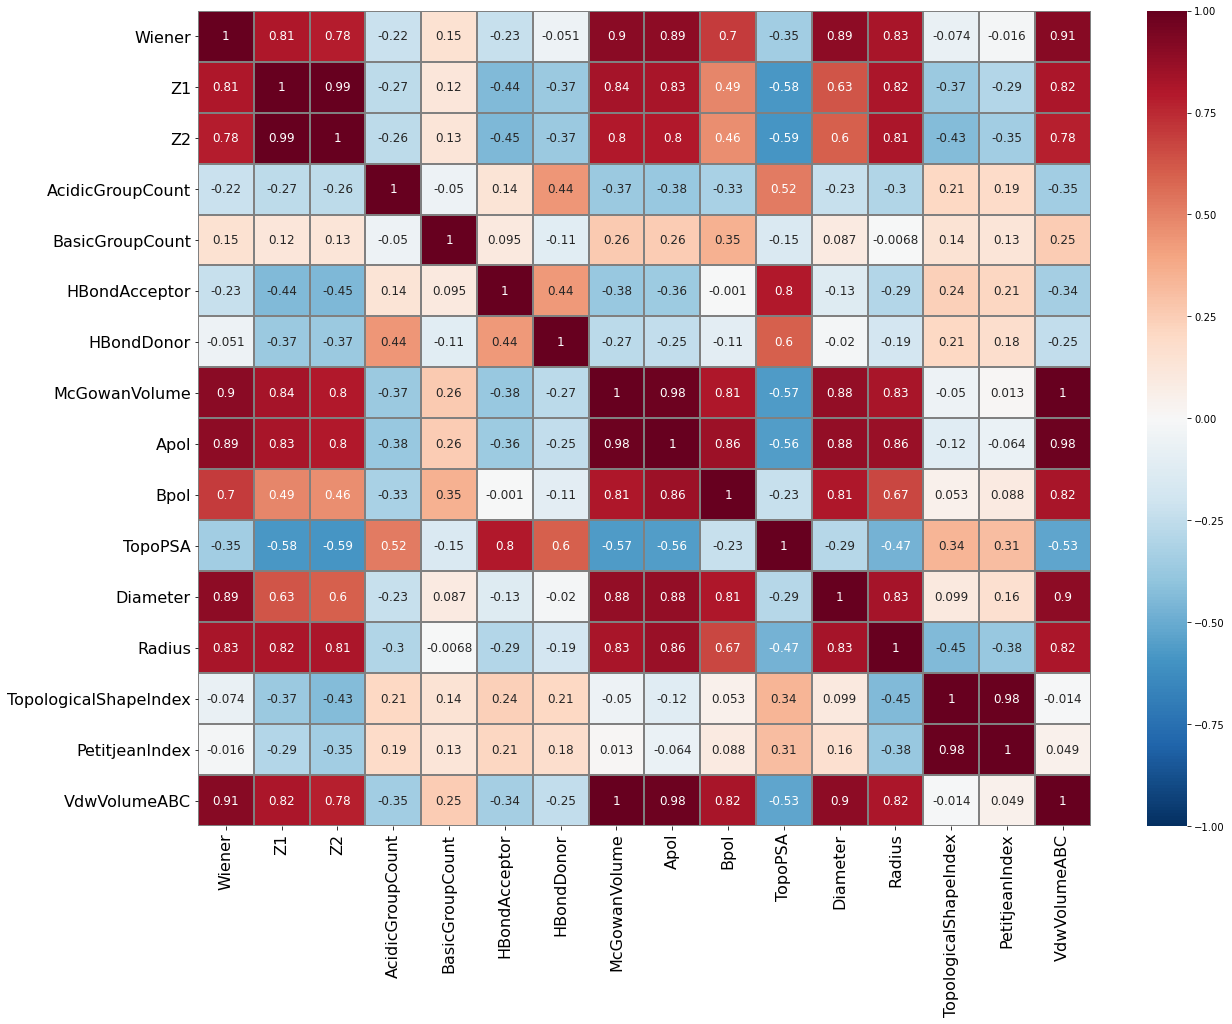

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cálculo da matriz de correlação
corrMat = df_data.corr()
# Gráfico da matriz de correlação como heatmap
plt.figure(figsize=(20,15))
plt.xticks(rotation=90, fontsize = 16)
plt.yticks(fontsize = 16)
sns.heatmap(corrMat, annot=True, annot_kws={"size": 12}, cmap="RdBu_r", linecolor='gray', 
            linewidths=0.35, vmin=-1, vmax=1, center=0)

In [58]:
del df_data['Z2']  # Apaga coluna do dataframe
del df_data['McGowanVolume']
del df_data['Apol']

In [59]:
df_data

,Wiener,Z1,AcidicGroupCount,BasicGroupCount,HBondAcceptor,HBondDonor,Bpol,TopoPSA,Diameter,Radius,TopologicalShapeIndex,PetitjeanIndex,VdwVolumeABC
benzene,27.0,24.0,0.0,0.0,0.0,0.0,6.019242,0.00,3.0,3.0,0.000000,0.000000,81.166534
methanol,1.0,2.0,0.0,0.0,1.0,1.0,4.012828,20.23,1.0,1.0,0.000000,0.000000,34.642671
ethanol,4.0,6.0,0.0,0.0,1.0,1.0,6.019242,20.23,2.0,1.0,1.000000,0.500000,51.938656
toluene,42.0,30.0,0.0,0.0,0.0,0.0,8.025656,0.00,4.0,3.0,0.333333,0.250000,98.462520
"1,4-xylene",62.0,36.0,0.0,0.0,0.0,0.0,10.032070,0.00,5.0,3.0,0.666667,0.400000,115.758505
"1,3-xylene",61.0,36.0,0.0,0.0,0.0,0.0,10.032070,0.00,4.0,3.0,0.333333,0.250000,115.758505
"1,2-xylene",60.0,36.0,0.0,0.0,0.0,0.0,10.032070,0.00,4.0,3.0,0.333333,0.250000,115.758505
cyclohexane,27.0,24.0,0.0,0.0,0.0,0.0,12.038484,0.00,3.0,3.0,0.000000,0.000000,99.975911
octan-1-ol,120.0,30.0,0.0,0.0,1.0,1.0,18.057726,20.23,8.0,4.0,1.000000,0.500000,155.714568
pentane,20.0,14.0,0.0,0.0,0.0,0.0,12.038484,0.00,4.0,2.0,1.000000,0.500000,95.036385


### Caixa de código 40: Análise de agrupamento nos dados do dataframe

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

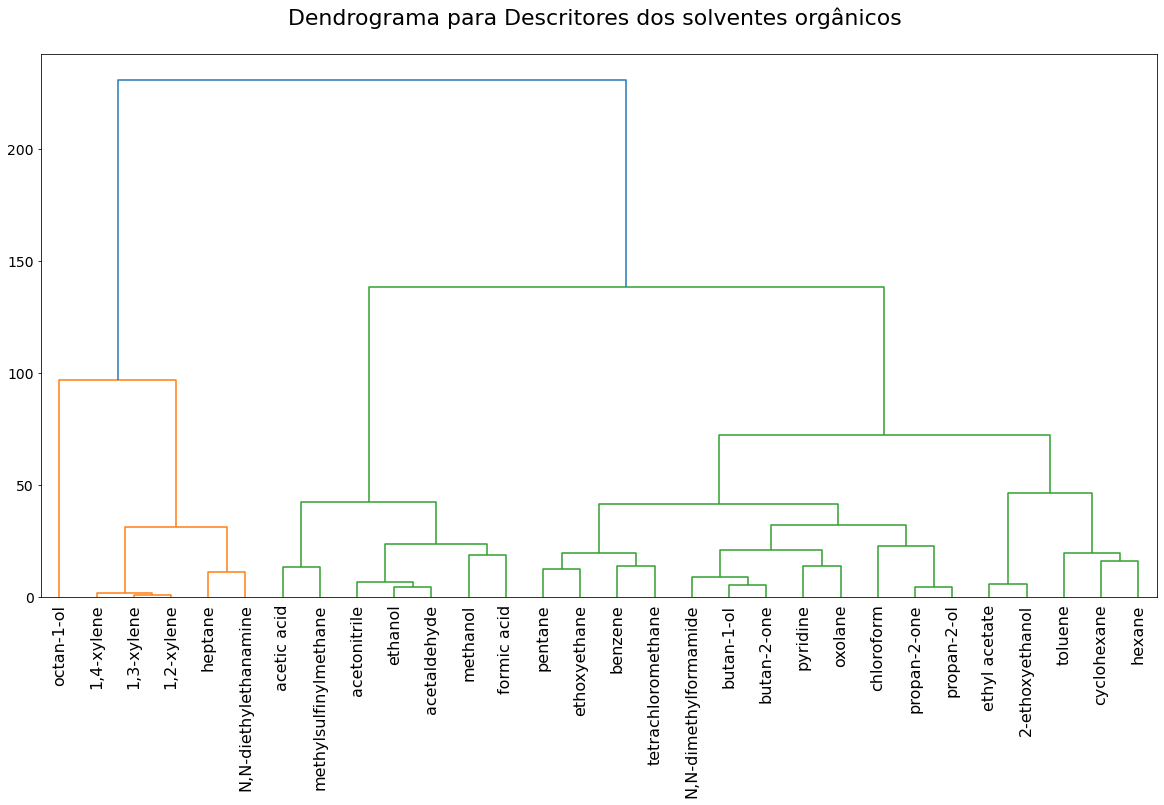

In [60]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title('Dendrograma para Descritores dos solventes orgânicos \n', fontsize = 22)
dend_solv = shc.dendrogram(shc.linkage(df_data, method='ward'), labels=names_smi) 
plt.xticks(rotation=90, fontsize = 16)
plt.yticks(fontsize = 14)

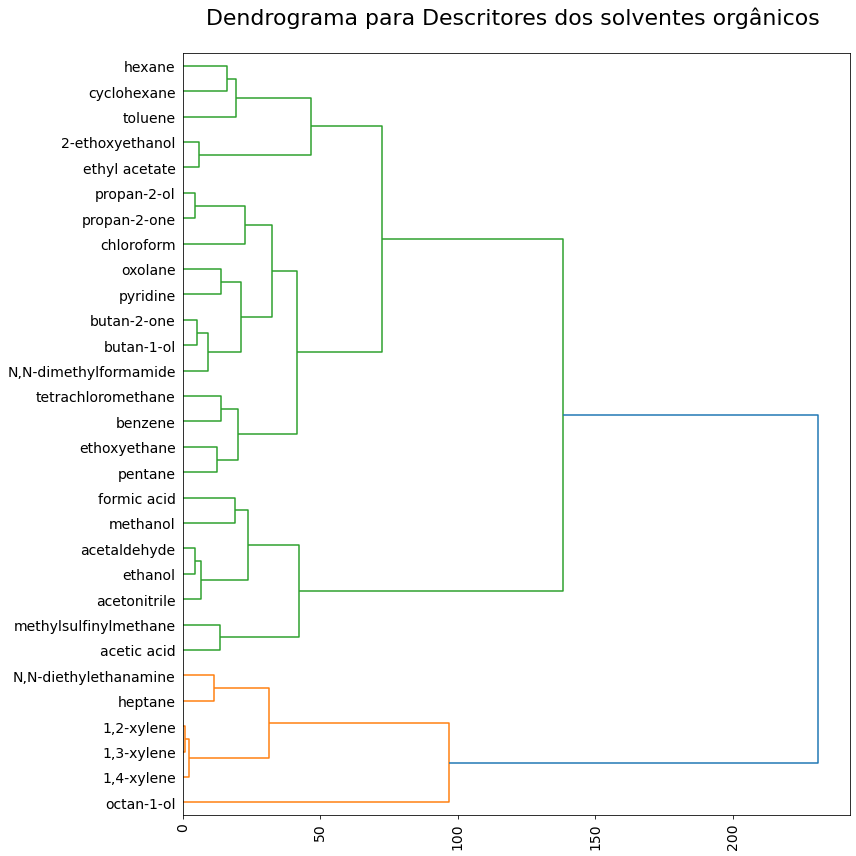

In [61]:
# O mesmo que o anterior só que em outra disposição
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(12, 12))
plt.title('Dendrograma para Descritores dos solventes orgânicos \n', fontsize = 22)
dend_solv = shc.dendrogram(shc.linkage(df_data, method='ward'), 
                           labels=names_smi, orientation='right') 
plt.xticks(rotation=90, fontsize = 14)
plt.yticks(fontsize = 14)
plt.tight_layout()